In [1]:
%load_ext autoreload
%autoreload 2
%aiida

UsageError: Line magic function `%aiida` not found.


# Create structure using pymatgen

In [ ]:
#!pip install pymatgen

In [2]:
import sys  
sys.path.insert(0, '../src/')
from view import *
from functions import *

from pymatgen.core.structure import Structure, Lattice

from pymatgen.transformations.advanced_transformations import CubicSupercellTransformation

struct = Structure.from_spacegroup('P6/mmm',
                                  Lattice.hexagonal(2.46,15),
                                  ['C'],
                                  [[1/3,2/3,1/2]])
tfms = CubicSupercellTransformation().apply_transformation(struct)

In [3]:
len(tfms)

112

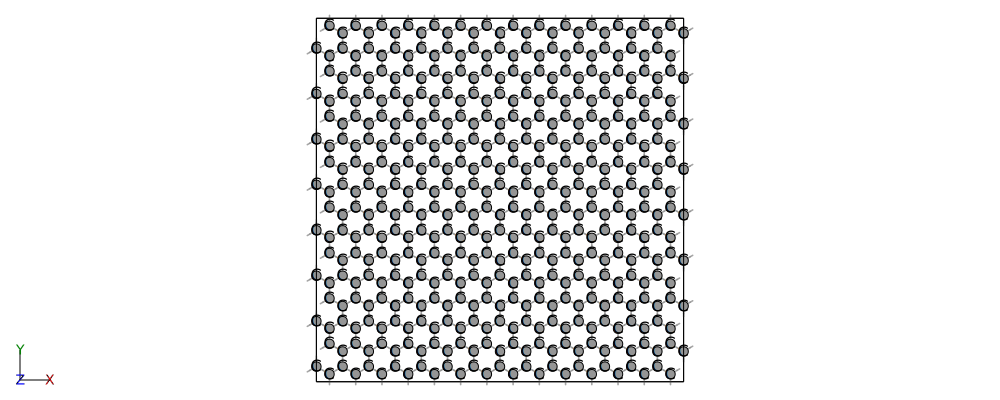

In [4]:
tfms = tfms*[2,2,1]
view_top(tfms)

In [5]:
tfms.lattice

Lattice
    abc : 34.44 34.086759892955506 15.0
 angles : 90.0 90.0 90.0
 volume : 17609.220160700814
      A : 34.44 0.0 2.108841788131742e-15
      B : 3.552713678800501e-15 34.086759892955506 3.615157351082987e-15
      C : 0.0 0.0 15.0

## Definitions for creating sac structures

### Single TM

In [6]:
def create_small_(element,adsorbate=True):
    sup = CubicSupercellTransformation().apply_transformation(struct)
    idx = []
    for i,coords in enumerate(sup.cart_coords):
        if coords[0] < 3 : idx.append(i)
        elif coords[0] > 14: idx.append(i)
        elif coords[1] < 3 : idx.append(i) 
        elif coords[1] > 14 : idx.append(i)
    sup.remove_sites(idx)

    sup.remove_sites(find_corner_idx(sup))
    sup.remove_sites(mid_idx(sup))

    for i in around_idx(sup):
        sup[i] = 'N'

    for i in h_idx(sup): sup[i]='H'

    if adsorbate==True:
        sup.append('H',[find_x_center(sup),find_y_center(sup),9.0],coords_are_cartesian=True)
    sup.append(element,[find_x_center(sup),find_y_center(sup),7.5],coords_are_cartesian=True)
    
    return sup


def create_large_(element,adsorbate=True):
    sup = CubicSupercellTransformation().apply_transformation(struct)
    sup = sup*[2,2,1]

    idx = []
    for i,coords in enumerate(sup.cart_coords):
        if coords[0] < 1.5: idx.append(i)
        elif coords[0] > 23: idx.append(i)
        elif coords[1] < 1 : idx.append(i) 
        elif coords[1] > 20 : idx.append(i)
    sup.remove_sites(idx)
    
    sup.remove_sites(find_corner_ix(sup,mid=False))
    
    sup.remove_sites(mid_idx(sup))
    for i in around_idx(sup):
        sup[i] = 'N'

    for i in h_idx(sup): sup[i]='H'
    for i in h_idx2(sup): sup[i]='H'

    if adsorbate==True:
        sup.append('H',[find_x_center(sup),find_y_center(sup),9.0],coords_are_cartesian=True)
    sup.append(element,[find_x_center(sup),find_y_center(sup),7.5],coords_are_cartesian=True)
    return sup

def create_medium_(element,adsorbate=True):
    sup = CubicSupercellTransformation().apply_transformation(struct)
    sup = sup*[2,2,1]

    idx = []
    for i,coords in enumerate(sup.cart_coords):
        if coords[0] < 8 : idx.append(i)
        elif coords[0] > 24.5: idx.append(i)
        elif coords[1] < 9.5 : idx.append(i) 
        elif coords[1] > 24.8 : idx.append(i)
    sup.remove_sites(idx)

    sup.remove_sites(find_corner_ix(sup))

    sup.remove_sites(mid_idx(sup))

    for i in around_idx(sup):
        sup[i] = 'N'

    for i in h_idx(sup): sup[i]='H'

    if adsorbate==True:
        sup.append('H',[find_x_center(sup),find_y_center(sup),9.0],coords_are_cartesian=True)
    sup.append(element,[find_x_center(sup),find_y_center(sup),7.5],coords_are_cartesian=True)
    return sup

### Co-TM

In [11]:
def create_large_co(element1,element2,adsorbate=True):
    
    sup = CubicSupercellTransformation().apply_transformation(struct)
    sup = sup*[2,2,1]

    idx = []
    for i,coords in enumerate(sup.cart_coords):
        if coords[0] < 1.5: idx.append(i)
        elif coords[0] > 23: idx.append(i)
        elif coords[1] < 1 : idx.append(i) 
        elif coords[1] > 20 : idx.append(i)
    sup.remove_sites(idx)

    sup.remove_sites(find_corner_ix(sup,mid=False))

    sup.remove_sites(mid_idx_co(sup))
    for i in around_idx_co(sup):
        sup[i] = 'N'

    for i in h_idx(sup): sup[i]='H'
    for i in h_idx2(sup): sup[i]='H'

    tm1 = [find_x_center_co(sup)[0],
           find_y_center_co(sup),
           7.5]
    tm2 = [find_x_center_co(sup)[1],
           find_y_center_co(sup),
           7.5]
    h1 =  [find_x_center_co(sup)[0],
           find_y_center_co(sup),
           9.0]
    h2 =  [find_x_center_co(sup)[1],
           find_y_center_co(sup),
           9.0]
    
    if adsorbate==True:
        sup.append('H',h1,coords_are_cartesian=True)
        sup.append('H',h2,coords_are_cartesian=True)

    sup.append(element1,tm1,coords_are_cartesian=True) #(11.07,12.07)
    sup.append(element2,tm2,coords_are_cartesian=True) #(13.53,12.07)
    
    return sup

## View Structures

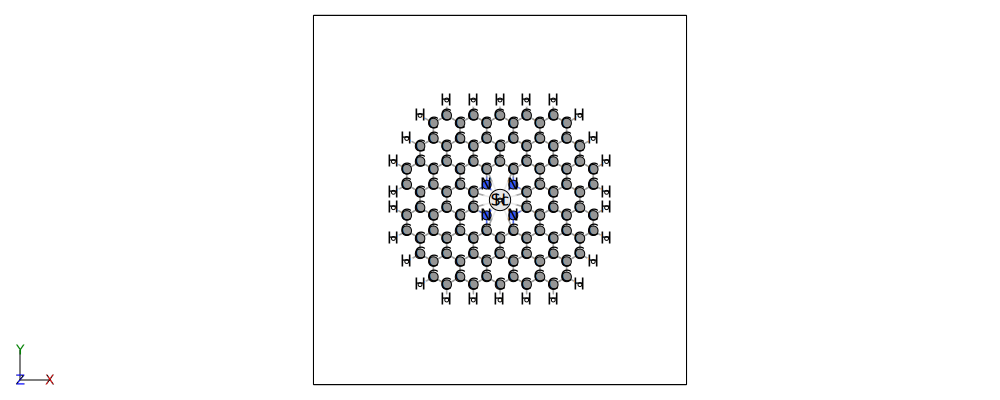

In [8]:
view_top(create_large_('Sc')) # Single TM

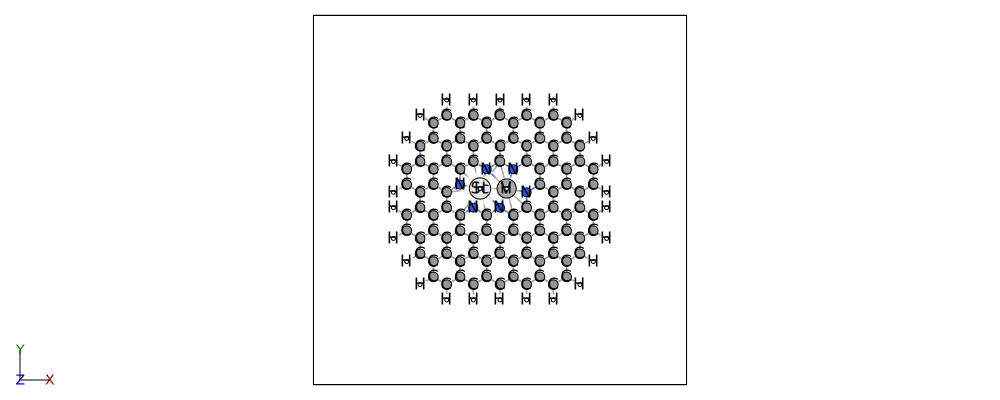

In [12]:
view_top(create_large_co('Sc','V',adsorbate=True)) # Co TM

## Create list of structures

In [14]:
tms = ['Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Zr','Nb','Mo','Tc',\
     'Ru','Rh','Pd','Ag','Cd','Hf','Ta','W','Re','Os','Ir','Pt','Au']

small_total=[]
for tm in tms:
    small_total.append(create_small_(tm))
    
medium_total=[]
for tm in tms:
    medium_total.append(create_medium_(tm))

large_total=[]
for tm in tms:
    large_total.append(create_large_(tm))
    
small=[]
for tm in tms:
    small.append(create_small_(tm,adsorbate=False))
    
medium=[]
for tm in tms:
    medium.append(create_medium_(tm,adsorbate=False))

large=[]
for tm in tms:
    large.append(create_large_(tm,adsorbate=False))

In [15]:
len(small), len(medium), len(large), len(small_total), len(medium_total), len(large_total)

(27, 27, 27, 27, 27, 27)

## Write POSCAR file

In [16]:
from pymatgen.io.vasp.inputs import Poscar

supp = create_large_co('Sc','V',adsorbate=True)
test = Poscar(supp)
test.write_file('POSCAR_co')

## Run aiida for all LF 

In [30]:
from aiida import orm
from aiida import plugins
from aiida.plugins import DataFactory
from aiida.engine import submit
from aiida.orm.nodes.data.upf import get_pseudos_from_structure

PwBaseWorkChain = plugins.WorkflowFactory('quantumespresso.pw.base')

code = load_code('qe-6.6-pw@arcc-msi')

structures = small

StructureData = DataFactory("structure")
KpointsData = DataFactory('array.kpoints')
kpoints = KpointsData()
kpoints.set_kpoints_mesh([1,1,1])

inputs = {
    'pw': {
        'code': code,
        'parameters': orm.Dict(dict={
            'CONTROL': {
                'calculation':'scf',
            },
            'SYSTEM':{
                'ecutwfc':150.,
                'occupations':'smearing',
                'degauss':0.02
            },
            'ELECTRONS':{
                'conv_thr':1.e-6,
            }
        }),
        'metadata':{
            'label':'LF-smallH',
            'options':{
                'account':'rd-hea',
                'resources':{
                    'num_machines':1,
                    'num_cores_per_mpiproc':32
                },
                'max_wallclock_seconds':1*24*60*60,
                'max_memory_kb':int(128e6)
            }
        }
    },
    'kpoints': kpoints,
}

for structure in structures:
    inputs['pw']['structure'] = StructureData(pymatgen_structure=structure)
    inputs['pw']['pseudos'] = get_pseudos_from_structure(StructureData(pymatgen=structure),'SSSP')
    submit(PwBaseWorkChain, **inputs)

## Run aiida for HF calcs

In [9]:
a = np.array([13,14,15,16,20,21,22,23,24])
small_redo = [small_total[i] for i in a] # accidentally did 6-LARGE

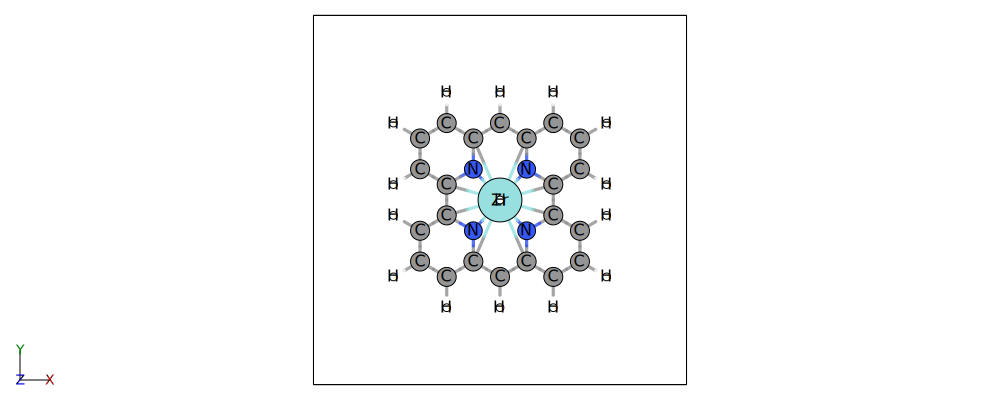

In [7]:
view_top(small_redo[1])

In [23]:
len(small_total[613])

IndexError: list index out of range

In [10]:
from aiida import orm
from aiida import plugins
from aiida.plugins import DataFactory, WorkflowFactory
from aiida.engine import submit
from aiida.orm.nodes.data.upf import get_pseudos_from_structure

# PwBaseWorkChain = WorkflowFactory('quantumespresso.pw.base')
PwRelaxWorkChain = WorkflowFactory('quantumespresso.pw.relax')

code = load_code('qe-6.6-pw@arcc-msi')

structures = small_redo

StructureData = DataFactory("structure")
KpointsData = DataFactory('array.kpoints')
kpoints = KpointsData()
kpoints.set_kpoints_mesh([3,3,1])

inputs = {
    'base':{
        'pw': {
            'code': code,
            'parameters': orm.Dict(dict={
                'SYSTEM':{
                    'ecutwfc':300.,
                    'occupations':'smearing',
                    'degauss':0.02
                    
                },
                'ELECTRONS':{
                    'conv_thr':1.e-6,
                }
            }),
            'metadata':{
                'label':'HF-medium',
                'options':{
                    'account':'rd-hea',
                    'resources':{
                        'num_machines':4,
                        'num_cores_per_mpiproc':32
                    },
                    'max_wallclock_seconds':2*24*60*60,
                    'max_memory_kb':int(128e6)
                }
            }
        },
        'kpoints': kpoints,        
    },
    'relaxation_scheme':orm.Str('relax')
}

for structure in structures:
    inputs['structure'] = StructureData(pymatgen=structure)
    inputs['base']['pw']['pseudos'] = get_pseudos_from_structure(StructureData(pymatgen=structure),'SSSP')
#     inputs['base_final_scf']['pw']['pseudos'] = get_pseudos_from_structure(StructureData(pymatgen=structure),'SSSP')
    submit(PwRelaxWorkChain, **inputs)

## Results

### 150 eV SMALL LF

In [ ]:
lst_out = [15025,15029,15036,15040,15047,15051,15058,15062,15069,\
           15073,15077,15084,15091,15095,15099,15106,15110,15117,\
           15121,15128,15132,15139,15143,15150,15154,15161,15165]

In [32]:
LF_small_out=[]
lst_out = [15025,15029,15036,15040,15047,15051,15058,15062,15069,\
           15073,15077,15084,15091,15095,15099,15106,15110,15117,\
           15121,15128,15132,15139,15143,15150,15154,15161,15165]
d_1 = pd.DataFrame(small_comp,columns=['comp'])
for i in lst_out:
    LF_small_out.append(load_node(i).outputs.output_parameters.\
                        dict.energy)
d_1['Ecat_LF']=LF_small_out
d_1.head()

,comp,Ecat_LF
0,C22H14N4Sc,-8073.547780
1,C22H14N4Ti,-8446.454423
2,C22H14N4V,-8797.099139
3,C22H14CrN4,-9210.491431
4,C22H14MnN4,-9696.806126


In [76]:
d_1

,comp,Ecat_LF,EcatH_LF,E_LF
0,C22H14N4Sc,-8073.547780,-8087.945840,1.601941
1,C22H14N4Ti,-8446.454423,-8462.355160,0.099263
2,C22H14N4V,-8797.099139,-8813.424672,-0.325533
3,C22H14CrN4,-9210.491431,-9226.855562,-0.364131
4,C22H14MnN4,-9696.806126,-9713.061701,-0.255575
5,C22H14FeN4,-11303.489515,-11319.566445,-0.076929
6,C22H14CoN4,-10885.272485,-10900.889096,0.383389
7,C22H14N4Ni,-11494.815352,-11509.025135,1.790217
8,C22H14CuN4,-12316.682509,-12330.342126,2.340383
9,C22H14N4Zn,-13103.029281,-13116.460553,2.568728


<AxesSubplot:xlabel='index'>

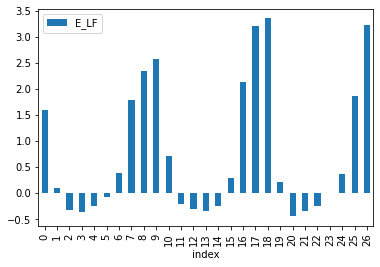

In [34]:
d_1['E_LF']=d_1['EcatH_LF']-d_1['Ecat_LF']+16
d_1.reset_index().plot(x='index', y='E_LF',kind='bar')

### 150 eV SMALL+H LF

In [ ]:
tms = ['Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu',\
       'Zn','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag',\
       'Cd','Hf','Ta','W','Re','Os','Ir','Pt','Au']

In [33]:
import pandas as pd
from aiida import orm
from aiida import plugins
from aiida.plugins import DataFactory
from aiida.engine import submit
from aiida.orm.nodes.data.upf import get_pseudos_from_structure

StructureData = DataFactory("structure")
KpointsData = DataFactory('array.kpoints')

small_comp = [StructureData(pymatgen_structure=f).get_formula() for f in small]
# d_2 = pd.DataFrame(small_comp,columns=['comp'])

LF_small_out=[]
lst_out = [14699,14703,14710,14714,14721,14725,14732,14736,14743,\
           14747,14754,14758,14765,14769,14776,14780,14787,14791,\
           14798,14802,14809,14813,14820,14824,14831,14835,14839]

for i in lst_out:
    LF_small_out.append(load_node(i).outputs.output_parameters.\
                        dict.energy)
d_1['EcatH_LF']=LF_small_out
d_1.head()
d_1.to_csv('LF_small_150.csv')

### 300 eV SMALL HF

In [ ]:
tms = ['Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu',\
       'Zn','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag',\
       'Cd','Hf','Ta','W','Re','Os','Ir','Pt','Au']

In [19]:
import pandas as pd
from aiida import orm
from aiida import plugins
from aiida.plugins import DataFactory
from aiida.engine import submit
from aiida.orm.nodes.data.upf import get_pseudos_from_structure

StructureData = DataFactory("structure")
KpointsData = DataFactory('array.kpoints')

small_comp = [StructureData(pymatgen_structure=f).get_formula() for f in small]
d_2 = pd.DataFrame(small_comp,columns=['comp'])

LF_small_out=[]
lst_out = [12388,12396,12407,12418,12429,12440,12451,12462,12470,\
           12481,12492,12503,12511,12807,12815,12826,12837,12848,\
           12859,12867,12878,12889,12900,12908,12919,12930,12941]

for i in lst_out:
    LF_small_out.append(load_node(i).outputs.output_parameters.\
                        dict.energy)
d_2['Ecat_HF']=LF_small_out
d_2.head()

,comp,Ecat_HF
0,C22H14N4Sc,-8091.524588
1,C22H14N4Ti,-8463.463853
2,C22H14N4V,-8813.913891
3,C22H14CrN4,-9227.318569
4,C22H14MnN4,-9713.702336


### 300 eV SMALL+H HF

In [ ]:
tms = ['Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu',\
       'Zn','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag',\
       'Cd','Hf','Ta','W','Re','Os','Ir','Pt','Au']

In [21]:
import pandas as pd
from aiida import orm
from aiida import plugins
from aiida.plugins import DataFactory
from aiida.engine import submit
from aiida.orm.nodes.data.upf import get_pseudos_from_structure

StructureData = DataFactory("structure")
KpointsData = DataFactory('array.kpoints')

small_comp = [StructureData(pymatgen_structure=f).get_formula() for f in small]
# d_2 = pd.DataFrame(small_comp,columns=['comp'])

LF_small_out=[]
lst_out = [13285,13293,13304,13315,13326,13678,13905,13356,13367,\
           13378,13916,13697,13924,14395,14403,14414,14425,14046,\
           14057,14068,14436,14447,14458,14466,14477,14128,14139]

for i in lst_out:
    LF_small_out.append(load_node(i).outputs.output_parameters.\
                        dict.energy)
d_2['EcatH_HF']=LF_small_out
d_2.head()
d_2.to_csv('HF_small_300.csv')

<AxesSubplot:xlabel='index'>

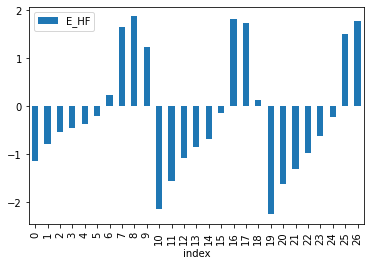

In [23]:
d_2['E_HF']=d_2['EcatH_HF']-d_2['Ecat_HF']+16
d_2.reset_index().plot(x='index', y='E_HF',kind='bar')